In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

### Extract the files from the .txt files found in `results` folder then save the values to a dictionary

In [3]:
folder_name = 'results'
path, _, files = list(os.walk('./%s' % folder_name))[0]

data = {
    'Name': [],
    'N': [],
    'Average MET': [],
    'Average Iterations + Swaps': []
}
for file in files:
    with open('./%s/%s' % (folder_name, file), 'r') as f:
        for line in f.readlines():
            # get the n, average met, and average iterations/count
            n, ave_met, ave_count = line.strip().split(' | ')
            
            # extract time(ms) from ave_met
            # ave_met format: Average Time Measured (ms): 2.587275
            ave_met = float(re.search(r'[0-9.]+', ave_met).group())
            
            # extract count from ave_count
            # ave_count format: Average Counter: 1073258550.60
            ave_count = float(re.search(r'[0-9.]+', ave_count).group())
            
            # store the values
            label = file.split('.')[0]
            data['Name'].append(label)
            data['N'].append(n)
            data['Average MET'].append(ave_met)
            data['Average Iterations + Swaps'].append(ave_count)
len(data['Name'])

60

### Convert the dictionary into dataframes

In [4]:
df = pd.DataFrame(data)
df['N'] = df['N'].astype(int)
df = df.sort_values(['N'])
df

,Name,N,Average MET,Average Iterations + Swaps
0,Insertion Sort,1024,0.704316,2.619530e+05
30,Selection Sort,1024,2.368381,2.599135e+05
40,Merge Sort,1024,0.141708,1.228700e+04
50,Quick Sort,1024,0.100678,9.252480e+03
10,Bubble Sort,1024,2.363955,2.619530e+05
20,Radix Sort,1024,0.103824,1.541000e+04
41,Merge Sort,2048,0.284963,2.662300e+04
21,Radix Sort,2048,0.201090,3.077000e+04
11,Bubble Sort,2048,8.846344,1.048761e+06
31,Selection Sort,2048,9.454002,1.033742e+06


In [5]:
grouped = df.groupby(['Name'])
sorts = grouped.groups.keys()
sorts

dict_keys(['Bubble Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort', 'Radix Sort', 'Selection Sort'])

In [6]:
n_values = list(df['N'].unique())
sorted(n_values)
n_values

[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]

In [7]:
sns.set()
sns.set_style('white')
sns.set_context('paper', font_scale=1.5)
sns.color_palette("husl")

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

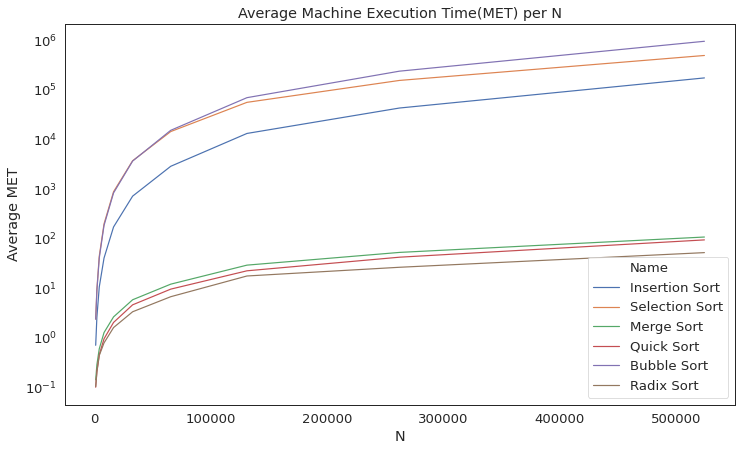

In [13]:
f, ax = plt.subplots(figsize=(12, 7))
ax.set(yscale="log")
sns.lineplot(x='N', y='Average MET', data=df, ax=ax, hue='Name')
plt.title('Average Machine Execution Time(MET) per N')
ax.figure.savefig("./graphs/ave_met_per_n.png")

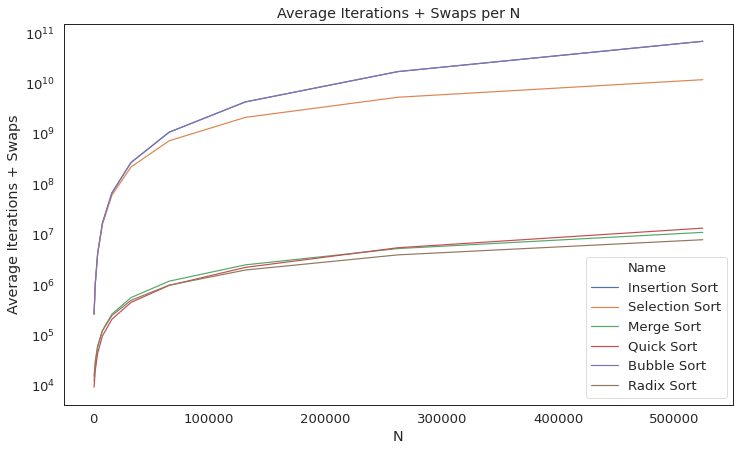

In [14]:
f, ax = plt.subplots(figsize=(12, 7))
ax.set(yscale="log")
sns.lineplot(x='N', y='Average Iterations + Swaps', data=df, ax=ax, hue='Name')
plt.title('Average Iterations + Swaps per N')
ax.figure.savefig("./graphs/ave_iter_per_n.png")